# US Homelessness Analysis: State-Level Trends and Population Correlation (2007-2024)

## 📋 Project Overview

The idea for this research came to me unexpectedly. I was honing my Python Pandas skills using an outdated homelessness dataset on DataCamp, and I became curious about the current situation. Moving to Seattle recently, I couldn't help but notice the significant number of homeless people. This led me to assume that perhaps Washington state had more homeless individuals than New York.

This project became an exciting opportunity to validate my expectations against real-world data while simultaneously practicing and enhancing my Python skills. It focuses on analyzing homelessness trends across US states using official data from the US Department of Housing and Urban Development (HUD) and population estimates from the US Census Bureau.

### Initial Hypotheses & Unexpected Discoveries

Initially, my husband and I expected New York to have the highest absolute number of homeless people. However, the data revealed a surprising twist: **California actually had the most homeless individuals** in 2024. This immediately made us curious about the *density* of homelessness. So, I decided to calculate the homeless ratio per 100,000 people for each state, using more recent governmental data.

The results were even more unexpected:
1.  **Hawaii (HI)** emerged as **Number 1** in 2024 for homelessness density (per 100K population).
2.  **New York (NY)** was in **3rd place** for density.
3.  And yes, **Washington (WA)** was indeed in the top 10 list for density, validating my initial observation!

Another striking finding that caught our attention was the difference between **sheltered and unsheltered homeless populations** across states. While approximately half of the homeless population in California in 2024 was unsheltered, over 80% of homeless individuals in New York were sheltered. This meant **New York actually had *fewer* unsheltered people than Washington**, which was quite counter-intuitive given the overall numbers.

This research is still ongoing, but I wanted to share the progress and some of these fascinating initial findings. Next, I'm eager to explore how the **cost of living** correlates with these homelessness factors.

## 📊  Dataset Description

### Primary Data Sources

#### 1. HUD Point-in-Time (PIT) Estimates (2007-2024)
-   **Source**: US Department of Housing and Urban Development
-   **URL**: https://www.huduser.gov/portal/datasets/ahar/2024-ahar-part-1-pit-estimates-of-homelessness-in-the-us.html
-   **File**: `2007-2024-PIT-Counts-by-State.xlsb`
-   **Description**: Annual Point-in-Time counts of homeless individuals across all US states and territories.
-   **Coverage**: All 50 states plus DC and US territories.
-   **Time Period**: 2007-2024.

#### 2. US Census Bureau Population Estimates (2024)
-   **Source**: US Census Bureau
-   **Description**: Latest available population estimates for all US states and territories.
-   **Year**: 2024.
-   **Coverage**: All 50 states, DC, and major US territories (Puerto Rico, Guam, Virgin Islands, Northern Mariana Islands, American Samoa).

#### 3. USA States GeoJSON
-   **Source**: Kaggle
-   **URL**: https://www.kaggle.com/datasets/pompelmo/usa-states-geojson/data
-   **Description**: GeoJSON encoding for US states, used for map plots.

### Data Structure Overview
-   **Total Records**: 56 jurisdictions (50 states + DC + 5 territories)
-   **Key Variables**: Columns used in this analysis include:
    -   `State`: Two-letter state/territory abbreviation.
    -   `Overall Homeless`: Total count of homeless individuals (from 2024 PIT count).
    -   `Sheltered Homeless`: Count of sheltered homeless individuals (from 2024 PIT count).
    -   `Unsheltered Homeless`: Count of unsheltered homeless individuals (from 2024 PIT count).
    -   `Population 2024`: Total population estimate for 2024.



In [1]:
# =============================================================================
# SECTION 1: IMPORTS AND SETUP
# =============================================================================


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import plotly.express as px

# Uncomment if the package is already installed
# pip install pyxlsb plotly

# for better aesthetics
sns.set_theme(style="whitegrid")

print("Imports successful! Plotting style set.")

Imports successful! Plotting style set.


In [2]:
# Defining the path to your downloaded data files

xlsb_file_path = '---' # Insert your path to the file
us_states_geojson_path = '---' # insert your path to the file

In [3]:
# =============================================================================
# SECTION 2: DATA LOADING AND INITIAL INSPECTION (HUD PIT Data)
# =============================================================================

# Loading the homelessness data from the Excel Binary file

print("\nLoading homelessness data...")
try:
    df = pd.read_excel(xlsb_file_path)
    print("Excel file loaded successfully!")
    print(f"Initial dataset shape: {df.shape}")
except FileNotFoundError:
    print(f"Error: The file '{xlsb_file_path}' was not found. Please check the path and ensure the file is in the specified location.")
    exit() 
except Exception as e:
    print(f"An error occurred while loading the Excel file: {e}")
    exit() 



Loading homelessness data...
Excel file loaded successfully!
Initial dataset shape: (60, 1306)


In [4]:
# Exploring basic information about the DataFrame
print("\n--- DataFrame Info ---")
df.info()



--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Columns: 1306 entries, State to Unsheltered Homeless Children of Parenting Youth
dtypes: float64(2), object(1304)
memory usage: 612.3+ KB


In [5]:
print("\n--- First 5 rows ---")
print(df.head())



--- First 5 rows ---
  State  Number of CoCs Overall Homeless Overall Homeless - Under 18  \
0    AK             2.0             2686                         443   
1    AL             9.0             4601                         761   
2    AR             5.0             2783                         328   
3    AS             0.0                                                
4    AZ             3.0            14737                        1904   

  Overall Homeless - Age 18 to 24 Overall Homeless - Over 24  \
0                             228                       2015   
1                             276                       3564   
2                             225                       2230   
3                                                              
4                            1017                      11816   

  Overall Homeless - Age 25 to 34 Overall Homeless - Age 35 to 44  \
0                             495                             624   
1                     

In [6]:
print("\n--- Last 5 rows (checking for totals/footnotes) ---")
print(df.tail())



--- Last 5 rows (checking for totals/footnotes) ---
                                                State  Number of CoCs  \
55                                                 WY             1.0   
56                                              Total           385.0   
57                                                NaN             NaN   
58  * File does not contain the imputed race or ra...             NaN   
59  ** Beginning in 2024, all variables for "Non-H...             NaN   

   Overall Homeless Overall Homeless - Under 18  \
55              501                          86   
56           771480                      148238   
57              NaN                         NaN   
58              NaN                         NaN   
59              NaN                         NaN   

   Overall Homeless - Age 18 to 24 Overall Homeless - Over 24  \
55                              66                        349   
56                           57640                     565602   
57    

In [7]:
print("\n--- Basic Statistics ---")
print(df.describe())



--- Basic Statistics ---
       Number of CoCs  \
count       57.000000   
mean        13.526316   
std         50.709292   
min          0.000000   
25%          2.000000   
50%          4.000000   
75%         10.000000   
max        385.000000   

       Overall Homeless Unaccompanied Youth (Under 25) - Non-Hispanic/Latina/e/o  
count                                          55.000000                          
mean                                          934.618182                          
std                                          3509.247759                          
min                                             3.000000                          
25%                                           116.000000                          
50%                                           252.000000                          
75%                                           494.500000                          
max                                         25702.000000                          


In [8]:
print("\n--- Data Types ---")
print(df.dtypes)


--- Data Types ---
State                                                    object
Number of CoCs                                          float64
Overall Homeless                                         object
Overall Homeless - Under 18                              object
Overall Homeless - Age 18 to 24                          object
                                                         ...   
Overall Homeless Children of Parenting Youth             object
Sheltered ES Homeless Children of Parenting Youth        object
Sheltered TH Homeless Children of Parenting Youth        object
Sheltered Total Homeless Children of Parenting Youth     object
Unsheltered Homeless Children of Parenting Youth         object
Length: 1306, dtype: object


In [9]:
# =============================================================================
# SECTION 3: DATA CLEANING AND PREPARATION (HUD PIT Data)
# =============================================================================

print("\n--- Cleaning and Preparing Homelessness Data ---")

# Converting nessesary columns to numeric.
# Errors are coerced to NaN, allowing us to drop non-numeric rows later.

columns_to_convert = ['Overall Homeless', 'Sheltered Total Homeless', 'Unsheltered Homeless']
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')


--- Cleaning and Preparing Homelessness Data ---


In [10]:
# Filtering out rows where 'Overall Homeless' is NaN 
df_filtered = df[df['Overall Homeless'].notna()].copy()


In [11]:
# Removing the 'Total' row and rows that are not standard state abbreviations (e.g., footnotes)

non_state_entries = ['Total', 'AS', 'GU', 'PR', 'VI', 'MP'] # Add other non-state entries as needed
df_no_total = df_filtered[~df_filtered['State'].isin(non_state_entries)].copy()


In [12]:
print(f"Shape after filtering non-numeric and 'Total' rows: {df_no_total.shape}")
print("\nFirst 5 rows of cleaned data:")
print(df_no_total.head())

Shape after filtering non-numeric and 'Total' rows: (51, 1306)

First 5 rows of cleaned data:
  State  Number of CoCs  Overall Homeless Overall Homeless - Under 18  \
0    AK             2.0            2686.0                         443   
1    AL             9.0            4601.0                         761   
2    AR             5.0            2783.0                         328   
4    AZ             3.0           14737.0                        1904   
5    CA            44.0          187084.0                       15302   

  Overall Homeless - Age 18 to 24 Overall Homeless - Over 24  \
0                             228                       2015   
1                             276                       3564   
2                             225                       2230   
4                            1017                      11816   
5                           10857                     160925   

  Overall Homeless - Age 25 to 34 Overall Homeless - Age 35 to 44  \
0            

In [13]:
# Selecting only the relevant columns for analysis for the most recent year (2024)

df_2024_homeless = df_no_total[['State', 'Overall Homeless', 'Sheltered Total Homeless', 'Unsheltered Homeless']].copy()
print("\nSelected 2024 homelessness data columns:")
print(df_2024_homeless.head())


Selected 2024 homelessness data columns:
  State  Overall Homeless  Sheltered Total Homeless  Unsheltered Homeless
0    AK            2686.0                    2207.0                 479.0
1    AL            4601.0                    1903.0                2698.0
2    AR            2783.0                    1449.0                1334.0
4    AZ           14737.0                    7446.0                7291.0
5    CA          187084.0                   63110.0              123974.0


In [14]:
# =============================================================================
# SECTION 4: US POPULATION DATA AND MERGING
# =============================================================================

print("\n--- Preparing US Population Data (2024) ---")



--- Preparing US Population Data (2024) ---


In [15]:
# Manually creating a DataFrame for 2024 US state populations (US Census Bureau)

us_population_2024_data = {
    'State': [
        'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'GU',
        'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI',
        'MN', 'MS', 'MO', 'MP', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC',
        'ND', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
        'VA', 'VI', 'VT', 'WA', 'WV', 'WI', 'WY', 'AS' # Included AS if you find a source for it, otherwise it will be NaN
    ],
    'Population 2024': [
        5157699, 740133, 7582384, 3088354, 39431263, 5957493, 3675069, 1051917,
        702250, 23372215, 11180878, 172951, # Guam 2024 est
        1446146, 2001619, 12710158, 6924275, 3241488, 2970606, 4588372, 4597740,
        1405012, 6263220, 7136171, 10140459, 5793151, 2943045, 6245466, 47326, # Northern Mariana Islands 2024 est
        1137233, 2005465, 3267467, 1409032, 9500851, 2130256, 19867248, 11046024,
        796568, 11883304, 4095393, 4272371, 13078751, 3203295, # Puerto Rico 2024 est
        1112308, 5478831, 924669, 7227750, 31290831, 3503613, 8811195, 98774, # U.S. Virgin Islands 2024 est
        648493, 7958180, 1769979, 5960975, 587618, 44293 # American Samoa 2024 est (from recent estimate)
    ]
}

In [16]:
df_population = pd.DataFrame(us_population_2024_data)
print("Population data created.")
print(df_population.head())


Population data created.
  State  Population 2024
0    AL          5157699
1    AK           740133
2    AZ          7582384
3    AR          3088354
4    CA         39431263


In [17]:
print("\n--- Merging Homelessness and Population Data ---")

df_final = pd.merge(df_2024_homeless, df_population, on='State', how='left')



--- Merging Homelessness and Population Data ---


In [18]:
# Check for states that might not have merged (NaN in Population 2024)
print("\nStates with missing population data after merge (e.g., territories not in Census data):")
print(df_final[df_final['Population 2024'].isna()])


States with missing population data after merge (e.g., territories not in Census data):
Empty DataFrame
Columns: [State, Overall Homeless, Sheltered Total Homeless, Unsheltered Homeless, Population 2024]
Index: []


In [19]:
# Droping rows where population data is missing (US territories not in our population dataset)
df_final.dropna(subset=['Population 2024'], inplace=True)
df_final['Population 2024'] = df_final['Population 2024'].astype(int) 

In [20]:
print("\nFinal merged DataFrame head:")
print(df_final.head())
print("\nFinal merged DataFrame info:")
df_final.info()



Final merged DataFrame head:
  State  Overall Homeless  Sheltered Total Homeless  Unsheltered Homeless  \
0    AK            2686.0                    2207.0                 479.0   
1    AL            4601.0                    1903.0                2698.0   
2    AR            2783.0                    1449.0                1334.0   
3    AZ           14737.0                    7446.0                7291.0   
4    CA          187084.0                   63110.0              123974.0   

   Population 2024  
0           740133  
1          5157699  
2          3088354  
3          7582384  
4         39431263  

Final merged DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   State                     51 non-null     object 
 1   Overall Homeless          51 non-null     float64
 2   Sheltered Total Homeless

In [21]:
# =============================================================================
# SECTION 5: ANALYSIS AND VISUALIZATIONS (2024 Data)
# =============================================================================

print("\n--- Beginning Analysis and Visualizations for 2024 Data ---")



--- Beginning Analysis and Visualizations for 2024 Data ---


In [22]:
# --- 5.1: Top 10 States by Overall Homeless Population (2024) ---

print("\n--- 5.1: Top 10 States by Overall Homeless Population (2024) ---")

df_top_homeless = df_final.sort_values('Overall Homeless', ascending=False).head(10)



--- 5.1: Top 10 States by Overall Homeless Population (2024) ---


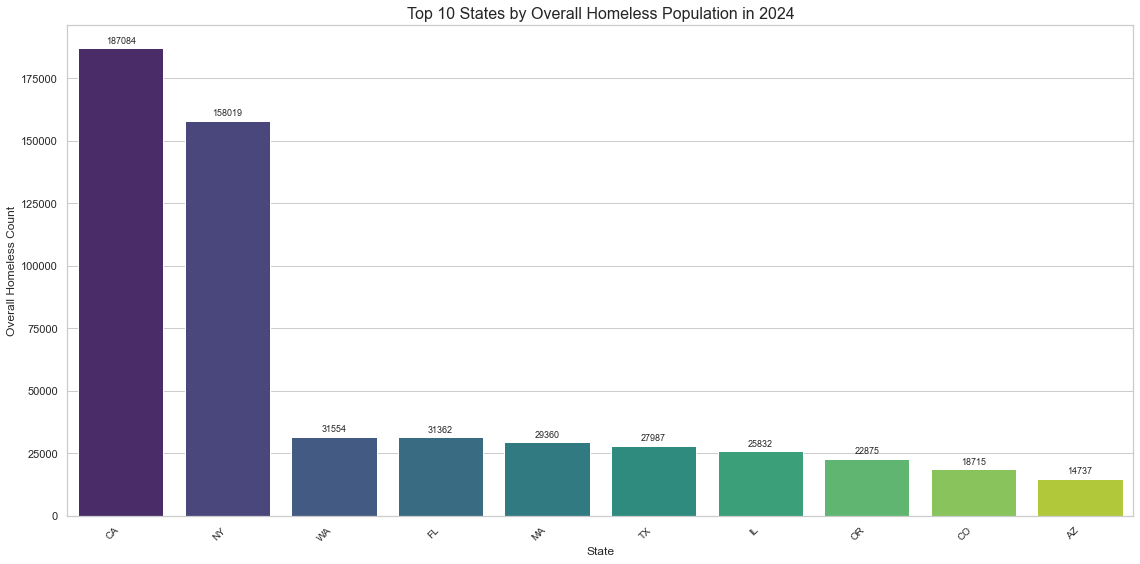

Insight: In 2024, California and New York have a significantly larger overall homeless population, totaling 345,103 individuals (187,084 in California and 158,019 in New York). This combined figure represents approximately 44.7% of the entire U.S. homeless population of 771,480.


In [23]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(
    x='State',
    y='Overall Homeless',
    data=df_top_homeless,
    palette='viridis'
)
plt.title('Top 10 States by Overall Homeless Population in 2024', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Overall Homeless Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10) # Rotate x-axis labels for readability

# Add value labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=9, padding=3)

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()
print(f"Insight: In 2024, California and New York have a significantly larger overall homeless population, totaling 345,103 individuals (187,084 in California and 158,019 in New York). This combined figure represents approximately 44.7% of the entire U.S. homeless population of 771,480.")


*My initial expectation was that New York would have the highest number of homeless people. However, the data clearly shows that California has a significantly larger absolute homeless population in 2024.*


In [24]:
# --- 5.2: Top 10 States with the Highest Population (for comparison) ---
print("\n--- 5.2: Top 10 States with the Highest Population (for comparison) ---")

df_top_population = df_final.sort_values('Population 2024', ascending=False).head(10)



--- 5.2: Top 10 States with the Highest Population (for comparison) ---


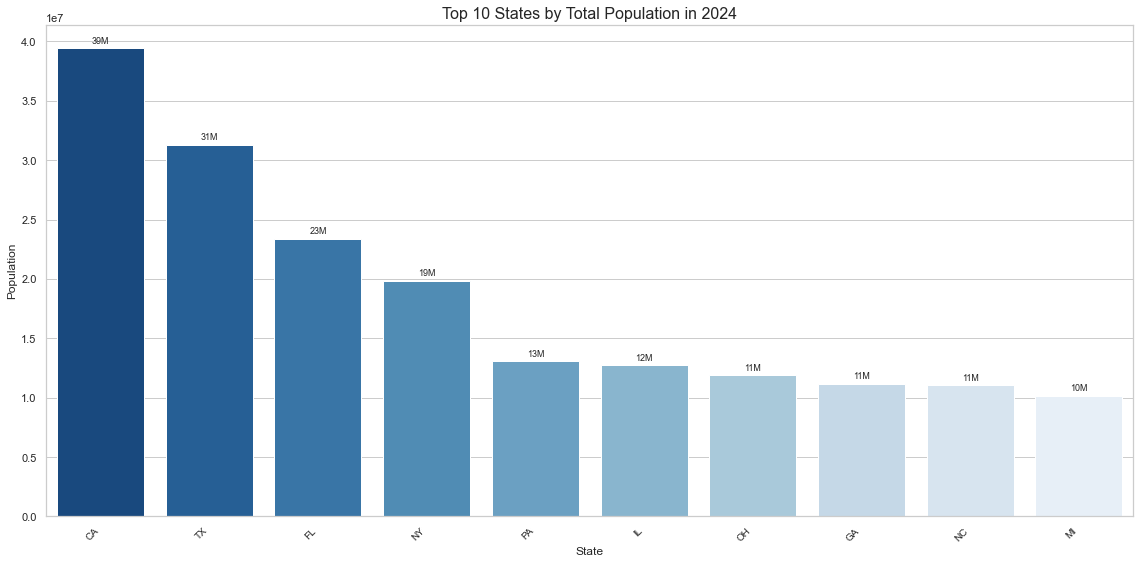

In [25]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(
    x='State',
    y='Population 2024',
    data=df_top_population,
    palette='Blues_r'
)
plt.title('Top 10 States by Total Population in 2024', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

labels_pop_formatted = []
for pop_val in df_top_population['Population 2024']:
    if pop_val >= 1_000_000:
        labels_pop_formatted.append(f'{int(pop_val/1_000_000)}M') # Millions
    elif pop_val >= 1_000:
        labels_pop_formatted.append(f'{int(pop_val/1_000)}K') # Thousands
    else:
        labels_pop_formatted.append(f'{int(pop_val)}') # Less than a thousand

for container in ax.containers:
    ax.bar_label(container, labels=labels_pop_formatted, label_type='edge', fontsize=9, padding=3)


plt.tight_layout()
plt.show()



In [26]:
# --- 5.3: Homelessness Rate per 100K Population ---
print("\n--- 5.3: Calculating Homelessness Rate per 100K Population ---")


--- 5.3: Calculating Homelessness Rate per 100K Population ---


In [27]:
# Calculate 'Homeless Per 100K'
df_final['Homeless Per 100K'] = (df_final['Overall Homeless'] / df_final['Population 2024']) * 100000


In [28]:
print("\nDataFrame with Homelessness Rate per 100K:")
print(df_final.head())



DataFrame with Homelessness Rate per 100K:
  State  Overall Homeless  Sheltered Total Homeless  Unsheltered Homeless  \
0    AK            2686.0                    2207.0                 479.0   
1    AL            4601.0                    1903.0                2698.0   
2    AR            2783.0                    1449.0                1334.0   
3    AZ           14737.0                    7446.0                7291.0   
4    CA          187084.0                   63110.0              123974.0   

   Population 2024  Homeless Per 100K  
0           740133         362.907748  
1          5157699          89.206447  
2          3088354          90.112727  
3          7582384         194.358397  
4         39431263         474.456017  


In [29]:
# 10 states with the highest homelessness rate (per 100K)
print("\n--- 10 States With The Highest Homelessness Rate (Per 100,000 Population) ---")
df_top_rate = df_final.sort_values('Homeless Per 100K', ascending=False).head(10)



--- 10 States With The Highest Homelessness Rate (Per 100,000 Population) ---


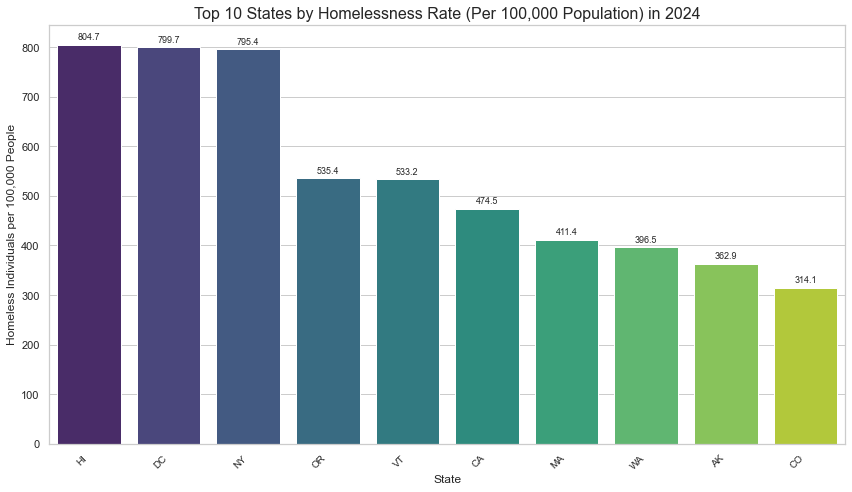

Insight: A significant and concerning trend emerges in Hawaii, Washington D.C., and New York. In 2024, nearly 1% of the population in these areas was experiencing homelessness. Specifically, there are approximately 805 homeless individuals per 100,000 residents in Hawaii, 800 per 100,000 in Washington D.C., and 795 per 100,000 in New York, underscoring the severe housing challenges faced by these populations.


In [30]:
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    x='State',
    y='Homeless Per 100K',
    data=df_top_rate,
    palette='viridis'
)
plt.title('Top 10 States by Homelessness Rate (Per 100,000 Population) in 2024', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Homeless Individuals per 100,000 People', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=9, padding=3)

plt.tight_layout()
plt.show()

print(f"Insight: A significant and concerning trend emerges in Hawaii, Washington D.C., and New York. In 2024, nearly 1% of the population in these areas was experiencing homelessness. Specifically, there are approximately 805 homeless individuals per 100,000 residents in Hawaii, 800 per 100,000 in Washington D.C., and 795 per 100,000 in New York, underscoring the severe housing challenges faced by these populations.")


*This metric reveals a different story! Hawaii is indeed Number 1 for density. New York is in 3rd place, and Washington state makes it into the top 10, confirming my local observations.*


--- Bottom 10 States by Homelessness Rate (Per 100,000 Population) ---


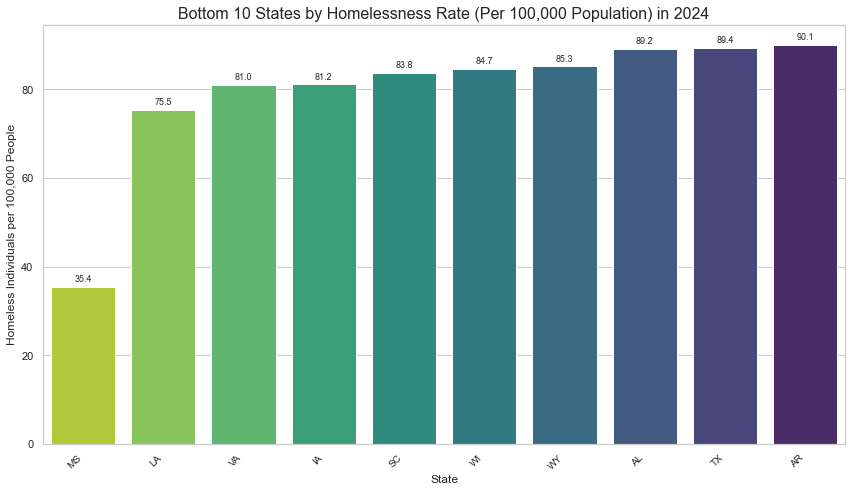

Insight: Mississippi had one of the lowest numbers of people experiencing homelessness per 100K population in 2024.


In [31]:
print("\n--- Bottom 10 States by Homelessness Rate (Per 100,000 Population) ---")
df_bottom_rate = df_final.sort_values('Homeless Per 100K', ascending=True).head(10)

plt.figure(figsize=(12, 7))
ax = sns.barplot(
    x='State',
    y='Homeless Per 100K',
    data=df_bottom_rate,
    palette='viridis_r' # Reversed viridis palette
)
plt.title('Bottom 10 States by Homelessness Rate (Per 100,000 Population) in 2024', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Homeless Individuals per 100,000 People', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=9, padding=3)

plt.tight_layout()
plt.show()

print(f"Insight: Mississippi had one of the lowest numbers of people experiencing homelessness per 100K population in 2024.")

In [32]:
# =============================================================================
# SECTION 6: ANALYZING HISTORICAL TRENDS (2007-2024)
# =============================================================================

print("\n--- Analyzing Historical Homelessness Trends (2007-2024) ---")



--- Analyzing Historical Homelessness Trends (2007-2024) ---


In [33]:
sheet_names = [str(year) for year in range(2024, 2006, -1)]


In [34]:
# Based on your df.info(), we'll assume these column names
state_col_name = 'State'
homeless_col_name = 'Overall Homeless'

In [35]:
# --- 1. Load Data from Multiple Sheets and Combine ---
all_years_data = []

print(f"Attempting to load sheets: {sheet_names}")

Attempting to load sheets: ['2024', '2023', '2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007']


In [36]:
# Combinining Sheets

for sheet_name in sheet_names:
    try:
        # Read the specific sheet
        df_year = pd.read_excel(xlsb_file_path , sheet_name=sheet_name)

        # Check if required columns exist before renaming/selecting
        if state_col_name not in df_year.columns or homeless_col_name not in df_year.columns:
            print(f"Skipping sheet '{sheet_name}': Missing '{state_col_name}' or '{homeless_col_name}' column.")
            continue

        # Rename columns to standard names ('State', 'Overall Homeless')
        df_year = df_year.rename(columns={
            state_col_name: 'State',
            homeless_col_name: 'Overall Homeless'
        })

        # Add a 'Year' column
        df_year['Year'] = int(sheet_name) # Sheet names are direct year numbers

        # Select only the relevant columns for consistency
        df_year = df_year[['State', 'Overall Homeless', 'Year']]

        all_years_data.append(df_year)
        print(f"Successfully loaded sheet: {sheet_name}")

    except FileNotFoundError:
        print(f"Error: Excel file '{excel_file_path}' not found. Please check the path and filename.")
        break # Exit loop if file not found
    except Exception as e:
        print(f"Error loading sheet '{sheet_name}': {e}")
        continue

# Check if any data was loaded
if not all_years_data:
    print("No data was loaded from any sheets. Please check sheet names, column names, and file path.")
    exit() # Exit if no data to process

# Concatenate all DataFrames into one
df_yearly_homeless = pd.concat(all_years_data, ignore_index=True)

print("\n--- Combined DataFrame Info (before final cleaning) ---")
df_yearly_homeless.info()



Successfully loaded sheet: 2024
Successfully loaded sheet: 2023
Successfully loaded sheet: 2022
Successfully loaded sheet: 2021
Successfully loaded sheet: 2020
Successfully loaded sheet: 2019
Successfully loaded sheet: 2018
Successfully loaded sheet: 2017
Successfully loaded sheet: 2016
Successfully loaded sheet: 2015
Successfully loaded sheet: 2014
Successfully loaded sheet: 2013
Successfully loaded sheet: 2012
Successfully loaded sheet: 2011
Successfully loaded sheet: 2010
Successfully loaded sheet: 2009
Successfully loaded sheet: 2008
Successfully loaded sheet: 2007

--- Combined DataFrame Info (before final cleaning) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   State             1029 non-null   object
 1   Overall Homeless  1026 non-null   object
 2   Year              1031 non-null   int64 
dtypes: int64(1), object(2)
mem

In [38]:
# --- 2. Clean Combined Data ---
# Ensuring 'State' column is string and clean up non-state entries (like 'Total', descriptive text)

df_yearly_homeless['State'] = df_yearly_homeless['State'].astype(str).str.strip()


In [39]:
# Converting 'Overall Homeless' to numeric, coercing errors to NaN

df_yearly_homeless['Overall Homeless'] = pd.to_numeric(df_yearly_homeless['Overall Homeless'], errors='coerce')


In [40]:
# Remove duplicates based on 'State' and 'Year', keeping the first occurrence
print("\n--- Deduplicating Data ---")
initial_rows = len(df_yearly_homeless)
df_yearly_homeless = df_yearly_homeless.drop_duplicates(subset=['State', 'Year'], keep='first')
print(f"Removed {initial_rows - len(df_yearly_homeless)} duplicate rows.")



--- Deduplicating Data ---
Removed 0 duplicate rows.


In [41]:
# Filter out non-state rows and rows with NaN in 'Overall Homeless'
# and also remove any rows where 'State' might be too short or a number
df_yearly_homeless_cleaned = df_yearly_homeless[
    (df_yearly_homeless['State'].str.len() == 2) & # Assuming all valid state codes are 2 letters
    (df_yearly_homeless['State'] != 'Total') &    # Exclude 'Total' row
    (df_yearly_homeless['State'] != 'nan') &      # Exclude 'nan' string (if it appears after astype(str))
    (~df_yearly_homeless['State'].str.contains(r'^\*|File does not contain|Beginning in', regex=True, na=False)) & # Exclude descriptive text starting with * or specific phrases
    (df_yearly_homeless['Overall Homeless'].notna()) # Keep only rows with valid homeless counts
].copy()

print("\n--- Cleaned DataFrame Info (ready for visualization) ---")
df_yearly_homeless_cleaned.info()
print("\nCleaned DataFrame Head:")
print(df_yearly_homeless_cleaned.head())



--- Cleaned DataFrame Info (ready for visualization) ---
<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 0 to 1029
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             978 non-null    object 
 1   Overall Homeless  978 non-null    float64
 2   Year              978 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 30.6+ KB

Cleaned DataFrame Head:
  State  Overall Homeless  Year
0    AK            2686.0  2024
1    AL            4601.0  2024
2    AR            2783.0  2024
4    AZ           14737.0  2024
5    CA          187084.0  2024


In [42]:
df_yearly_homeless_cleaned.head()

,State,Overall Homeless,Year
0,AK,2686.0,2024
1,AL,4601.0,2024
2,AR,2783.0,2024
4,AZ,14737.0,2024
5,CA,187084.0,2024


In [48]:
# Let's again find states with the Highest Amount of Homeless in 2024

# --- 1. Find the Top 10 States in 2024 by Homeless Amount ---
df_2024_data = df_yearly_homeless_cleaned[df_yearly_homeless_cleaned['Year'] == 2024]


In [56]:
# Sort by 'Overall Homeless' and get the top 10 states
top_10_states_2024_list = df_2024_data.sort_values(by='Overall Homeless', ascending=False).head(10)['State'].tolist()


In [57]:
# --- 2. Filter the Full Yearly Data for These Top 10 States ---
df_top_10_yearly_trend = df_yearly_homeless_cleaned[
    df_yearly_homeless_cleaned['State'].isin(top_10_states_2024_list)
].copy()


In [58]:

# Sort by year and then state for consistent plotting
df_top_10_yearly_trend = df_top_10_yearly_trend.sort_values(by=['Year', 'State'])

print("\nData for Top 10 States Across All Years (Head - after deduplication and filtering):")
print(df_top_10_yearly_trend.head())


Data for Top 10 States Across All Years (Head - after deduplication and filtering):
    State  Overall Homeless  Year
978    AZ           14646.0  2007
979    CA          138986.0  2007
980    CO           14225.0  2007
984    FL           48069.0  2007
990    IL           15487.0  2007


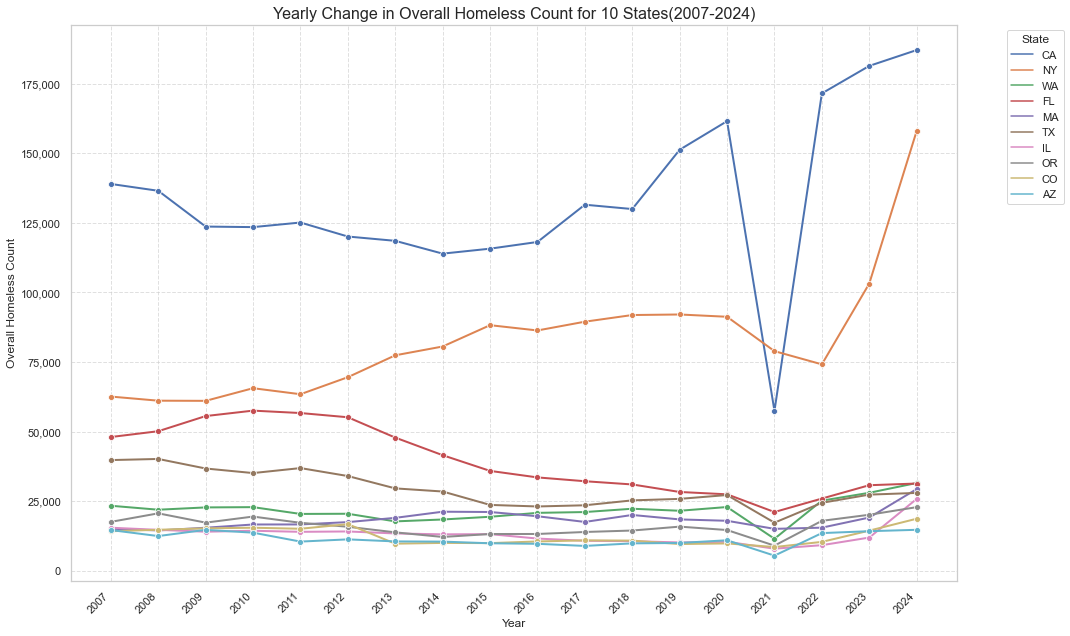

Insight: California experienced a notable fluctuation in its homeless population around 2021. The count reportedly dropped significantly from 162K to 57K, only to rise again to 172K. This dramatic shift prompts questions about the factors at play, particularly concerning the aftermath of the COVID-19 pandemic and its impact on homelessness trends in the state.


In [63]:
# --- 3. Visualize the Yearly Trend for These Top 10 States ---
plt.figure(figsize=(15, 9)) # Slightly larger figure for more states

sns.lineplot(
        data=df_top_10_yearly_trend,
        x='Year',
        y='Overall Homeless',
        hue='State',
        hue_order=top_10_states_2024_list,
        marker='o',
        linewidth=2
)

plt.title('Yearly Change in Overall Homeless Count for 10 States(2007-2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Overall Homeless Count', fontsize=12)


min_year = df_top_10_yearly_trend['Year'].min()
max_year = df_top_10_yearly_trend['Year'].max()
plt.xticks(range(min_year, max_year + 1), rotation=45, ha='right')

# Scale y-axis if numbers are very large (e.g., millions/thousands)
formatter = plt.FuncFormatter(lambda x, loc: f'{int(x):,}') 
plt.gca().yaxis.set_major_formatter(formatter)


plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout()
plt.show()

print(f"Insight: California experienced a notable fluctuation in its homeless population around 2021. The count reportedly dropped significantly from 162K to 57K, only to rise again to 172K. This dramatic shift prompts questions about the factors at play, particularly concerning the aftermath of the COVID-19 pandemic and its impact on homelessness trends in the state.")

In [64]:

# =============================================================================
# SECTION 7: SHELTERED VS. UNSHELTERED HOMELESSNESS (2024)
# =============================================================================

print("\n--- Analyzing Sheltered vs. Unsheltered Homelessness (2024) ---")



--- Analyzing Sheltered vs. Unsheltered Homelessness (2024) ---


In [66]:
# Focus on the top states by overall homelessness as identified earlier (df_top_homeless)
df_sheltered_unsheltered = df_top_homeless[['State', 'Sheltered Total Homeless', 'Unsheltered Homeless']].copy()



In [68]:
# Melt the DataFrame to long format for stacked bar plot
df_sheltered_unsheltered_melted = df_sheltered_unsheltered.melt(
    id_vars='State',
    var_name='Shelter Status',
    value_name='Count'
)

print("\nSheltered vs. Unsheltered data (melted format):")
print(df_sheltered_unsheltered_melted.head())



Sheltered vs. Unsheltered data (melted format):
  State            Shelter Status     Count
0    CA  Sheltered Total Homeless   63110.0
1    NY  Sheltered Total Homeless  152381.0
2    WA  Sheltered Total Homeless   15332.0
3    FL  Sheltered Total Homeless   14494.0
4    MA  Sheltered Total Homeless   27725.0


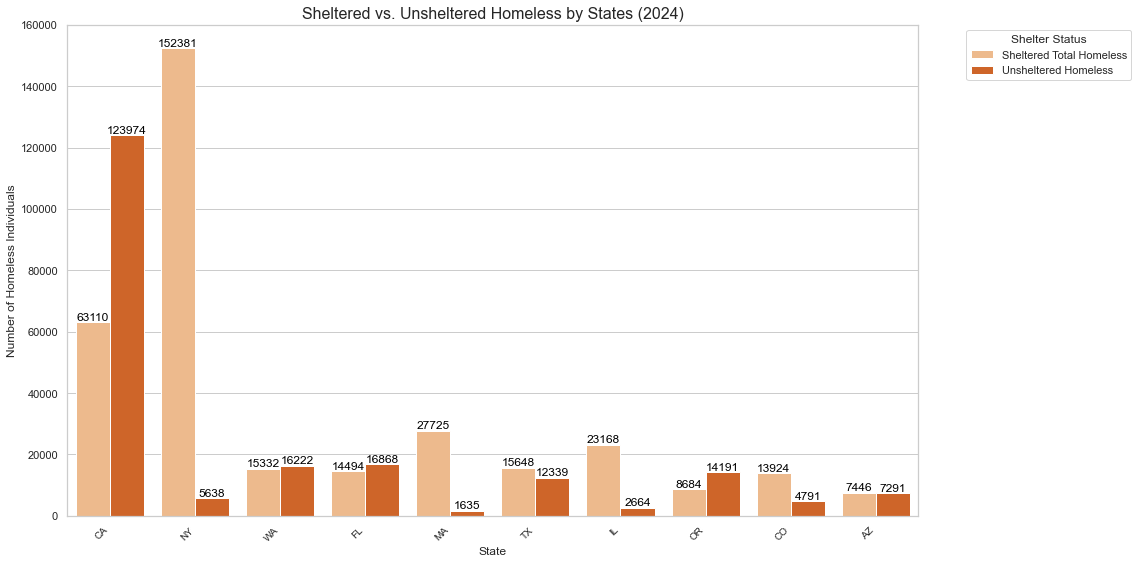

Insight: While about 66%(124,000 out of 187,000) of California's homeless population in 2024 was unsheltered, over 96%(152,000 out of 158,000) of New York's homeless were sheltered. Interestingly, this means New York actually has a lower number of unsheltered individuals than Washington State, despite New York's much higher overall homeless count.


In [88]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(
    x='State',
    y='Count',
    hue='Shelter Status',
    data=df_sheltered_unsheltered_melted,
    palette='Oranges'
)

plt.title('Sheltered vs. Unsheltered Homeless by States (2024)', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Homeless Individuals', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Shelter Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add value labels for better interpretation
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=12, color='black')

plt.tight_layout()
plt.show()

print(f"Insight: While about 66%(124,000 out of 187,000) of California's homeless population in 2024 was unsheltered, over 96%(152,000 out of 158,000) of New York's homeless were sheltered. Interestingly, this means New York actually has a lower number of unsheltered individuals than Washington State, despite New York's much higher overall homeless count.")



In [96]:
# =============================================================================
# SECTION 8: GEOGRAPHICAL DISTRIBUTION (CHOROPLETH MAPS)
# =============================================================================

print("\n--- Visualizing Geographical Distribution with Choropleth Maps ---")


--- Visualizing Geographical Distribution with Choropleth Maps ---


In [97]:
df_2024 = pd.read_excel(xlsb_file_path, sheet_name='2024')


In [98]:
# Ensure 'Overall Homeless' is numeric. Blanks will become NaN.
df_2024['Overall Homeless'] = pd.to_numeric(df_2024['Overall Homeless'], errors='coerce')


In [99]:
# Drop rows where 'Overall Homeless' is NaN (e.g., for territories like 'AS' if they have no data)
df_2024.dropna(subset=['Overall Homeless'], inplace=True)


In [100]:
non_state_entries = ['Total', 'US', 'PR', 'VI', 'GU', 'AS', 'MP'] # Add any other non-state codes if they appear
df_2024 = df_2024[~df_2024['State'].isin(non_state_entries)].copy()


In [101]:

# Load the GeoJSON file containing US state boundaries
with open(us_states_geojson_path, 'r') as f:
    us_states_geojson = json.load(f)

In [105]:
# --- Choropleth Map Creation ---
fig = px.choropleth(
    df_2024,
    geojson=us_states_geojson,
    locations='State', # Use the 'State' column directly as it now has abbreviations
    featureidkey='id', # Point to the 'id' field in your GeoJSON features for matching
    color='Overall Homeless',
    hover_name='State', # Display the state abbreviation on hover
    color_continuous_scale="Oranges", # Colormap: 'Viridis' for high to low (dense to light)
    scope="usa",
    title='Overall Homelessness by State in 2024',
    labels={'Overall Homeless': 'Total Homeless Individuals'}
)

# Update layout for better appearance
fig.update_geos(
    visible=False,
    resolution=50, # Set resolution (110m, 50m, 10m)
    showland=True, showcoastlines=True, showcountries=True, showsubunits=True
)
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})

# Show the figure
fig.show()

# You can also save the map as an HTML file
# fig.write_html("us_homelessness_heatmap_2024.html")

print("Interactive map for 'Overall Homelessness' generated. It should appear below or open in your browser.")


Interactive map for 'Overall Homelessness' generated. It should appear below or open in your browser.


In [106]:
# --- 8.1: Overall Homelessness by State in 2024 (Heatmap) ---
print("\n--- 8.1: Overall Homelessness by State Heatmap ---")



--- 8.1: Overall Homelessness by State Heatmap ---


In [110]:
# Getting Our Early Calculated Homeless Per 100k Variable


df_homeless_ratio = df_final[['State', 'Overall Homeless', 'Population 2024', 'Homeless Per 100K']].sort_values('Homeless Per 100K', ascending = False)

In [111]:
df_homeless_ratio 

,State,Overall Homeless,Population 2024,Homeless Per 100K
11,HI,11637.0,1446146,804.690536
7,DC,5616.0,702250,799.715201
34,NY,158019.0,19867248,795.374377
37,OR,22875.0,4272371,535.416985
46,VT,3458.0,648493,533.236288
4,CA,187084.0,39431263,474.456017
19,MA,29360.0,7136171,411.425119
47,WA,31554.0,7958180,396.497692
0,AK,2686.0,740133,362.907748
5,CO,18715.0,5957493,314.142207


In [112]:
data_sample = {
    'State': [
        'HI', 'DC', 'NY', 'GU', 'OR', 'VT', 'CA', 'MA', 'WA', 'AK', 'CO', 'NV',
        'VI', 'RI', 'NM', 'IL', 'AZ', 'ME', 'MT', 'MN', 'NH', 'SD', 'ID', 'NE',
        'FL', 'NJ', 'OK', 'DE', 'MO', 'TN', 'KY', 'GA', 'UT', 'ND', 'PA', 'NC',
        'WV', 'OH', 'MD', 'MI', 'KS', 'CT', 'IN', 'AR', 'AL', 'TX', 'WI', 'WY',
        'SC', 'IA', 'VA', 'LA', 'PR', 'MS' # All 53 entries
    ],
    'Overall Homeless': [
        11637.0, 5616.0, 158019.0, 1249.0, 22875.0, 3458.0, 187084.0, 29360.0,
        31554.0, 2686.0, 18715.0, 10106.0, 279.0, 2442.0, 4631.0, 25832.0,
        14737.0, 2702.0, 2008.0, 9201.0, 2245.0, 1338.0, 2750.0, 2720.0,
        31362.0, 12762.0, 5467.0, 1358.0, 7312.0, 8280.0, 5231.0, 12290.0,
        3869.0, 865.0, 14088.0, 11626.0, 1779.0, 11759.0, 6069.0, 9739.0,
        2793.0, 3410.0, 6285.0, 2783.0, 4601.0, 27987.0, 5049.0, 501.0,
        4593.0, 2631.0, 7141.0, 3469.0, 2096.0, 1041.0
    ],
    'Population 2024': [
        1446146.0, 702250.0, 19867248.0, 172951.0, 4272371.0, 648493.0, 39431263.0,
        7136171.0, 7958180.0, 740133.0, 5957493.0, 3267467.0, 98774.0, 1112308.0,
        2130256.0, 12710158.0, 7582384.0, 1405012.0, 1137233.0, 5793151.0,
        1409032.0, 924669.0, 2001619.0, 2005465.0, 23372215.0, 9500851.0,
        4095393.0, 1051917.0, 6245466.0, 7227750.0, 4588372.0, 11180878.0,
        3503613.0, 796568.0, 13078751.0, 11046024.0, 1769979.0, 11883304.0,
        6263220.0, 10140459.0, 2970606.0, 3675069.0, 6924275.0, 3088354.0,
        5157699.0, 31290831.0, 5960975.0, 587618.0, 5478831.0, 3241488.0,
        8811195.0, 4597740.0, 3203295.0, 2943045.0
    ],
    'Homeless Per 100K': [
        805.0, 800.0, 795.0, 722.0, 535.0, 533.0, 474.0, 411.0, 396.0, 363.0,
        314.0, 309.0, 282.0, 220.0, 217.0, 203.0, 194.0, 192.0, 177.0, 159.0,
        159.0, 145.0, 137.0, 136.0, 134.0, 134.0, 133.0, 129.0, 117.0, 115.0,
        114.0, 110.0, 110.0, 109.0, 108.0, 105.0, 101.0, 99.0, 97.0, 96.0,
        94.0, 93.0, 91.0, 90.0, 89.0, 89.0, 85.0, 85.0, 84.0, 81.0, 81.0,
        75.0, 65.0, 35.0
    ]
}


In [113]:
df_homeless_ratio = pd.DataFrame(data_sample) # In your actual code, this would be your loaded/calculated DataFrame.


In [114]:
# Ensure 'Homeless Per 100K' is numeric.
df_homeless_ratio['Homeless Per 100K'] = pd.to_numeric(df_homeless_ratio['Homeless Per 100K'], errors='coerce')

# Drop rows where 'Homeless Per 100K' is NaN, as these states cannot be colored.
df_homeless_ratio.dropna(subset=['Homeless Per 100K'], inplace=True)


In [115]:
# Filter out non-state entries from the 'State' column if necessary.
# This ensures only valid state abbreviations are used for mapping.
# 'GU', 'DC' are often mapped by Plotly, but can be explicitly excluded if desired.
non_state_entries = ['Total', 'US', 'PR', 'VI', 'AS', 'MP']
df_homeless_ratio = df_homeless_ratio[~df_homeless_ratio['State'].isin(non_state_entries)].copy()


In [116]:
# Load the GeoJSON file containing US state boundaries
with open(us_states_geojson_path, 'r') as f:
    us_states_geojson = json.load(f)

In [90]:
# Load the GeoJSON file containing US state boundaries
try:
    with open(us_states_geojson_path, 'r') as f:
        us_states_geojson = json.load(f)
    print("GeoJSON file loaded successfully!")
except FileNotFoundError:
    print(f"Error: The GeoJSON file '{us_states_geojson_path}' was not found. Please check the path.")
    exit()
except Exception as e:
    print(f"An error occurred while loading the GeoJSON file: {e}")
    exit()

GeoJSON file loaded successfully!


In [118]:
# --- Choropleth Map Creation ---
fig = px.choropleth(
    df_homeless_ratio, # Use your df_homeless_ratio DataFrame
    geojson=us_states_geojson,
    locations='State', # Use the 'State' column directly (abbreviations)
    featureidkey='id', # Point to the 'id' field in your GeoJSON features for matching
    color='Homeless Per 100K', # Color intensity based on 'Homeless Per 100K'
    hover_name='State', # Display the state abbreviation on hover
    color_continuous_scale="Oranges", # Colormap: 'Viridis' (denser for high, lighter for low)
    scope="usa",
    title='Homelessness Ratio Per 100K Population by State in 2024',
    labels={'Homeless Per 100K': 'Homeless Individuals per 100,000 People'}
)

# Update layout for better appearance
fig.update_geos(
    visible=False,
    resolution=50, # Resolution of map (110m, 50m, 10m)
    showland=True, showcoastlines=True, showcountries=True, showsubunits=True
)
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})

# Show the figure (this will open it in your browser or display in a compatible environment like Jupyter)
fig.show()

# You can also save the map as an HTML file
# fig.write_html("us_homelessness_ratio_heatmap_2024.html")

# =============================================================================
# SECTION 9: CONCLUSION AND FUTURE WORK
# =============================================================================

print("\n--- Conclusion and Future Work ---")


## 🎯 Research Applications

This analysis can be valuable for:
- **Policy Makers**: Understanding state-level homelessness distribution
- **Non-Profit Organizations**: Resource allocation and program planning
- **Researchers**: Baseline data for homelessness studies
- **Public Health Officials**: Population health planning
- **Urban Planners**: Housing and service planning

## 🔮 Future Analysis Opportunities

1. **Demographic Breakdown**: Analyze by age, family status, and veteran status
2. **Correlation Studies**: Examine relationships with housing costs, unemployment, weather patterns
3. **Predictive Modeling**: Forecast future trends based on historical data

## 📊 Data Quality Notes

- All data sources are official government statistics
- PIT counts represent annual snapshots, typically conducted in January
- Population estimates are the most recent available from Census Bureau
- Some territories may have limited historical data availability


## 🤝 Contributing

This project welcomes contributions, particularly:
- Additional data sources (housing costs, economic indicators)
- Advanced statistical analysis
- Interactive visualizations
- Geographic mapping capabilities

## 📄 License

This project uses publicly available government data. Please cite original data sources when using this analysis.

## 📞 Contact

- Linkedin: linkedin.com/in/azhar-kudaibergen/
- Email: kuda.azhar@gmail.com
---

**Data Sources**:
- US Department of Housing and Urban Development - Annual Homeless Assessment Report
- US Census Bureau - Population Estimates Program
